In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Prepare Data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Define MLP Model
mlp = MLPClassifier()

In [ ]:
# Step 4: Define Parameter Grid
param_grid = {
    'hidden_layer_sizes': [
        (100,) * n_layers for n_layers in [2, 3, 5, 7, 9]
        # (50, 50), (100, 50, 25), (200, 100, 50, 25, 10), etc.
        # We can modify the number of neurons in each tuple as needed.
    ],
    'learning_rate_init': [0.005, 0.05, 0.5],
    'batch_size': [16, 32, 64]
}


In [ ]:
# Step 5: Perform Grid Search Cross-Validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'batch_size': [16, 32, 64],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100),
                                                (100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100,
                                                 100),
                                                (100, 100, 100, 100, 100, 100,
                                                 100, 100, 100)],
                         'learning_rate_init': [0.005, 0.05, 0.5]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'batch_size': [16, 32, 64],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100),
                                                (100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100,
                                                 100),
                                                (100, 100, 100, 100, 100, 100,
                                                 100, 100, 100)],
                         'learning_rate_init': [0.005, 0.05, 0.5]},
             scoring='accuracy')

In [ ]:
# Step 6: Evaluate Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

In [ ]:
# Step 7: Train Final Model
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate_init=0.005)

MLPClassifier(batch_size=32, hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate_init=0.005)

In [ ]:
# Evaluate on Test Set
test_accuracy = best_mlp.score(X_test, y_test)
print("Test set accuracy with best parameters: {:.2f}".format(test_accuracy))

Test set accuracy with best parameters: 0.84
Test set accuracy with best parameters: 0.84


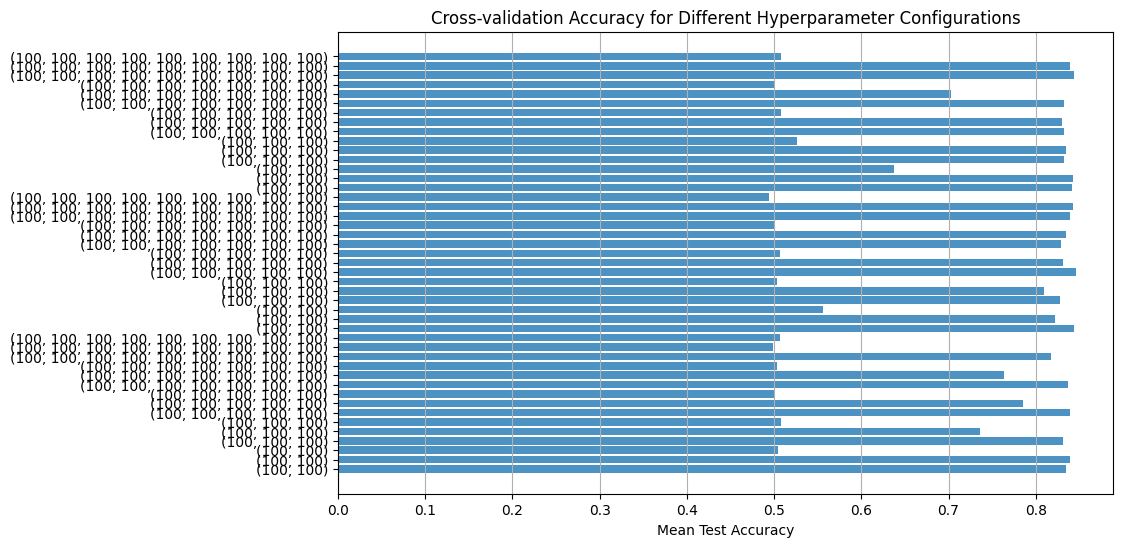

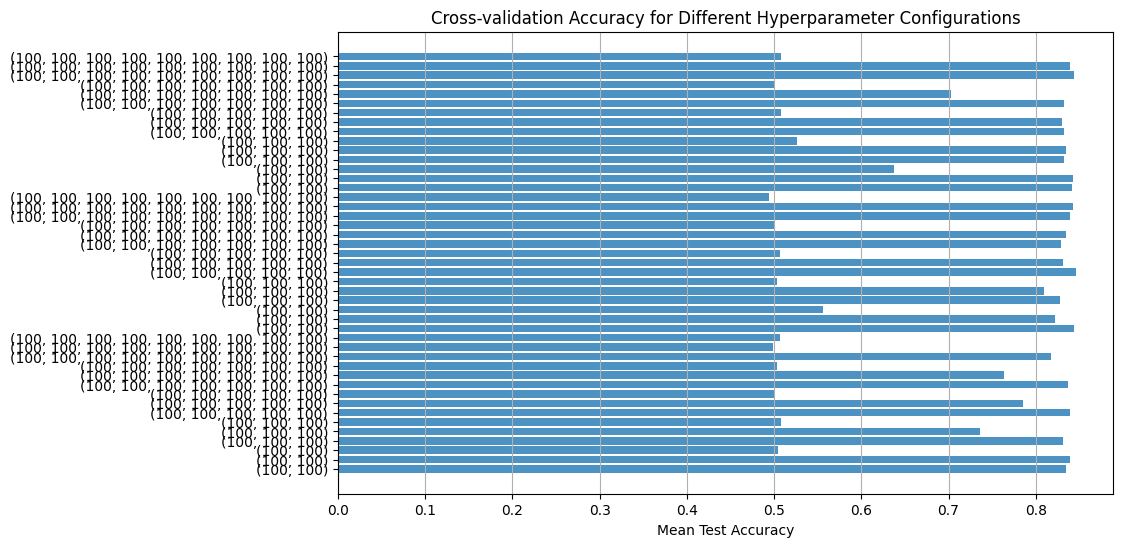

In [ ]:
# Extract results from grid search
results = grid_search.cv_results_
hidden_layer_sizes = [str(params['hidden_layer_sizes']) for params in results['params']]
mean_test_score = results['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(hidden_layer_sizes)), mean_test_score, align='center', alpha=0.8)
plt.yticks(np.arange(len(hidden_layer_sizes)), hidden_layer_sizes)
plt.xlabel('Mean Test Accuracy')
plt.title('Cross-validation Accuracy for Different Hyperparameter Configurations')
plt.grid(axis='x')
plt.show()
